imports the data set and does a really simple reformatting accross it to remove \\N with pd.NA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtpl

circ = pd.read_csv('data_bases/circuits.csv')
constr_re = pd.read_csv('data_bases/constructor_results.csv')
constr_std = pd.read_csv('data_bases/constructor_standings.csv')
constr = pd.read_csv('data_bases/constructors.csv')
driver = pd.read_csv('data_bases/drivers.csv')
driver_std = pd.read_csv('data_bases/driver_standings.csv')
lap_times = pd.read_csv('data_bases/lap_times.csv')
pit_stops = pd.read_csv('data_bases/pit_stops.csv')
qualifying = pd.read_csv('data_bases/qualifying.csv')
races = pd.read_csv('data_bases/races.csv')
results = pd.read_csv('data_bases/results.csv')
sprint_results = pd.read_csv('data_bases/sprint_results.csv')
status = pd.read_csv('data_bases/status.csv')

data_bases = [circ, constr, constr_re, constr_std, driver, driver_std, lap_times, pit_stops, qualifying, races, results, sprint_results, status]

def help_format(x):
    if x == '\\N':
        return pd.NA
    else:
        return x

for i in data_bases:
    i.map(lambda x: help_format(x))

# Pit stop durations - Identifying outliers

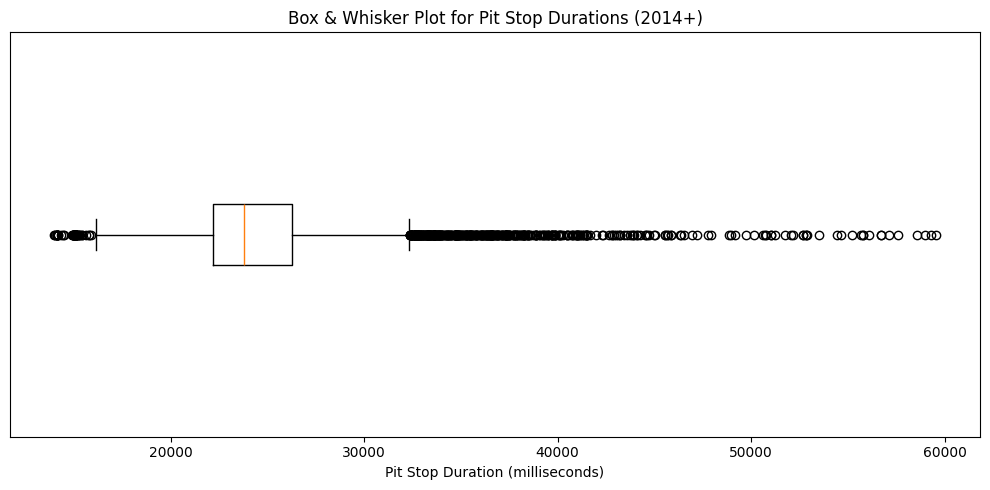

Median pit stop duration (milliseconds): 23792.0


In [57]:
# 2nd statistical methods: Are there any unusually long pit stop durations(outlier) in Formula 1 races from 2014 onwards?
# Answer: Yes, there are many long pit stops that clearly stand out as outliers in the data.
# These extreme values could be caused by technical issues, penalties, or even data errors, and should be analyzed separately from typical pit stop behavior.

# Dataset used: pit_stops.csv (which includes: raceId, driverId, stop, lap, time, duration, milliseconds)


# Merge pit stop data with race info to get the year
pit_merged = pd.merge(pit_stops, races[['raceId', 'year']], on='raceId')


# Filter for races from 2014 onward
pit_filtered = pit_merged[pit_merged['year'] >= 2014].copy()


# Remove bad durations with ":" like 16:37.029, those extreme and unusual long pitstop time
pit_filtered = pit_filtered[pit_filtered['duration'].str.contains(":") == False]


# Drop missing values
pit_filtered = pit_filtered.dropna(subset=['milliseconds'])


mtpl.figure(figsize=(10, 5))
mtpl.boxplot(pit_filtered['milliseconds'], vert=False)
mtpl.title("Box & Whisker Plot for Pit Stop Durations (2014+)")
mtpl.xlabel("Pit Stop Duration (milliseconds)")
mtpl.yticks([]) # Remove the '1' in default y-axis
mtpl.ticklabel_format(style='plain', axis='x') # Disables scientific notation
mtpl.tight_layout()
mtpl.show()


print("Median pit stop duration (milliseconds):", pit_filtered['milliseconds'].median())


# Identifying Top Constructors since 2000

We will merge the constructor, results and races csv files to then get a database with the name of the constructors and its respective total points

In [ ]:
teams = constr.merge(results, on='constructorId')
teams = teams.merge(races, on='raceId')

# Rename the merged result
teams_simple = teams[['name_x', 'points', 'year']]
teams_simple = teams_simple.rename(columns={'name_x':'name'})
teams_simple

# Just get the top teams that have more than 50 points
top_teams = teams_simple[teams_simple['year'] > 2000].groupby('name').agg({'points':'sum'}).sort_values('points',ascending=False).reset_index()
top_teams = top_teams[top_teams['points'] >= 50]
display(top_teams)

,name,points
0,Red Bull,7673.0
1,Ferrari,7661.5
2,Mercedes,7591.5
3,McLaren,4583.0
4,Williams,1609.5
5,Renault,1465.0
6,Force India,1098.0
7,Lotus F1,706.0
8,Toro Rosso,500.0
9,Alpine F1 Team,498.0


<BarContainer object of 22 artists>

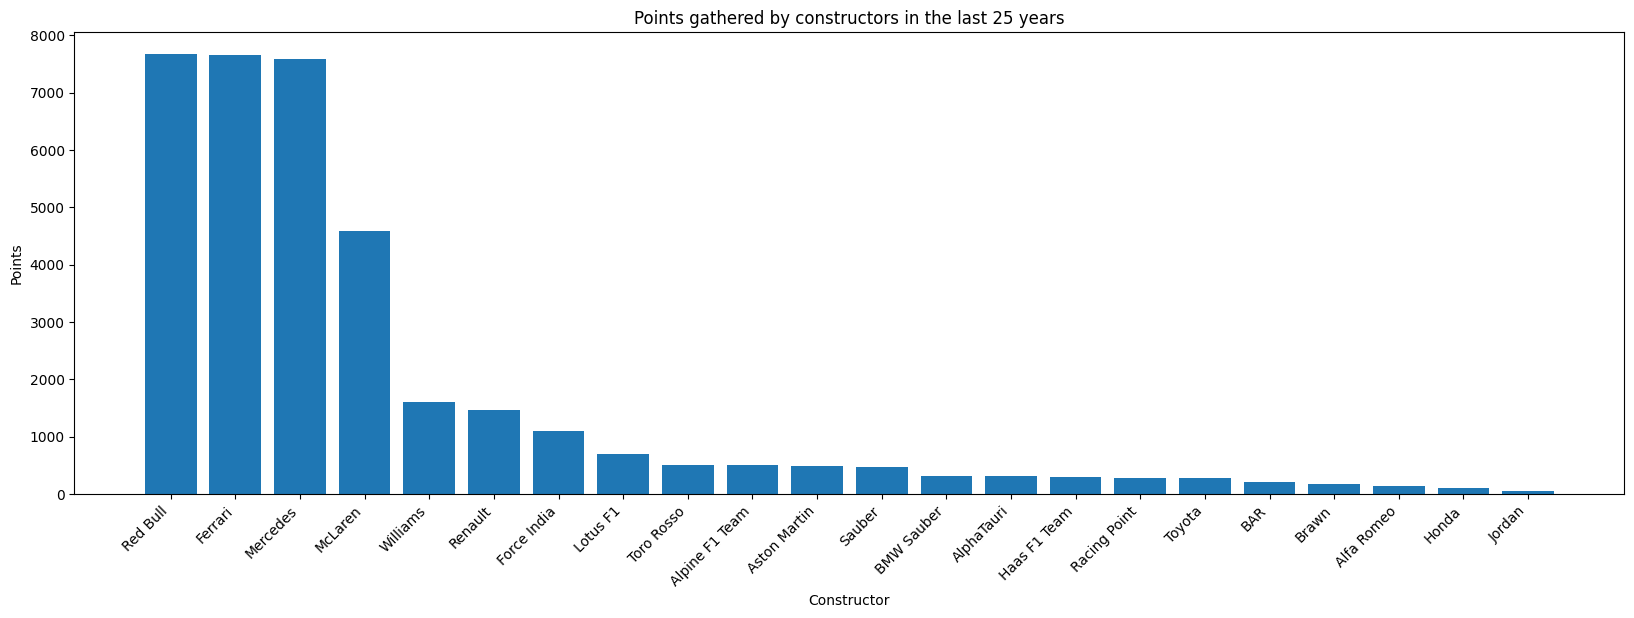

In [56]:
mtpl.figure(figsize=(20,6))
mtpl.xticks(rotation=45, ha='right')
mtpl.xlabel('Constructor')
mtpl.ylabel('Points')
mtpl.title('Points gathered by constructors in the last 25 years')
mtpl.bar(top_teams['name'], top_teams['points'])